In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dalex as dx
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

pd.set_option('display.max_rows', 100, 'display.max_columns', 400)

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("D:/UMM/Tugas Akhir/Dataset/DataFinal32K.csv")

In [3]:
data

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,all_activity_sumclick,after_clicks_sum,before_clicks_sum,forumng_clicks_sum,homepage_clicks_sum,oucontent_clicks_sum,subpage_clicks_sum,url_clicks_sum,resource_clicks_sum,glossary_clicks_sum,dataplus_clicks_sum,oucollaborate_clicks_sum,quiz_clicks_sum,ouelluminate_clicks_sum,sharedsubpage_clicks_sum,questionnaire_clicks_sum,page_clicks_sum,externalquiz_clicks_sum,ouwiki_clicks_sum,dualpane_clicks_sum,repeatactivity_clicks_sum,folder_clicks_sum,htmlactivity_clicks_sum,date_registration,module_presentation_length,CMA_sumScore,TMA_sumScore,Exam_sumScore
0,0,1,1,0,1,9,2,0,240,0,Pass,934,836,98,193,138,553,32,5,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,159,268,0,410,0
1,0,1,0,6,1,2,1,0,60,0,Pass,1435,1220,215,417,324,537,87,48,12,0,10,0,0,0,0,0,0,0,0,0,0,0,0,53,268,0,332,0
2,0,1,0,5,0,3,1,0,60,1,Withdrawn,281,179,102,126,59,66,22,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,92,268,0,0,0
3,0,1,0,7,0,5,1,0,60,0,Pass,2158,1989,169,634,432,836,144,90,19,1,2,0,0,0,0,0,0,0,0,0,0,0,0,52,268,0,380,0
4,0,1,0,11,0,5,0,0,60,0,Pass,1034,739,295,194,204,494,79,14,45,4,0,0,0,0,0,0,0,0,0,0,0,0,0,176,268,0,272,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,6,3,0,10,0,1,0,0,30,0,Fail,41,39,2,0,22,6,9,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,269,0,0,0
32589,6,3,0,0,0,4,1,0,30,0,Distinction,893,893,0,65,167,348,47,0,109,5,0,0,152,0,0,0,0,0,0,0,0,0,0,23,269,560,233,0
32590,6,3,0,8,0,2,0,0,30,1,Pass,312,297,15,0,63,79,20,0,19,1,0,0,130,0,0,0,0,0,0,0,0,0,0,129,269,480,210,0
32591,6,3,0,7,0,9,1,0,30,0,Withdrawn,275,210,65,118,65,40,12,0,9,0,0,0,31,0,0,0,0,0,0,0,0,0,0,49,269,100,83,0


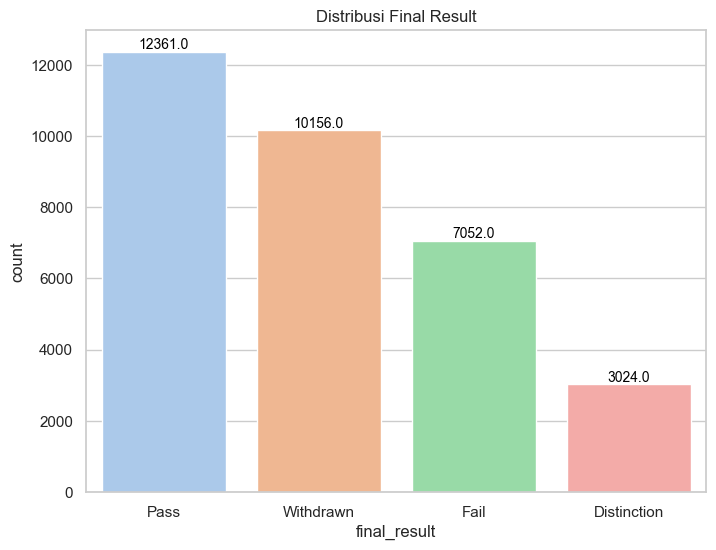

In [4]:
result_distribution = data['final_result'].value_counts()

sns.set(style="whitegrid")
sns.color_palette("pastel")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='final_result', data=data, palette="pastel")

# Menambahkan nilai setiap label di atas batang diagram
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribusi Final Result')
plt.show()

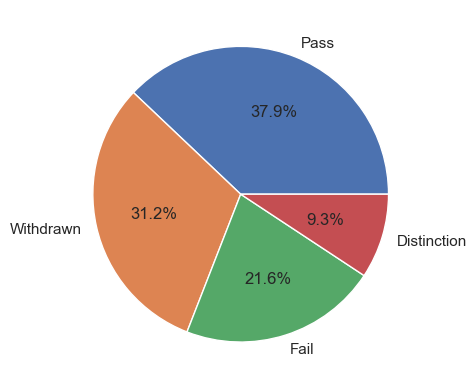

In [5]:
plt.pie(data['final_result'].value_counts().values,
        labels = data['final_result'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [6]:
data = data[data['final_result'].isin(['Distinction', 'Fail'])]

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data['final_result'] = label_encoder.fit_transform(data['final_result'])

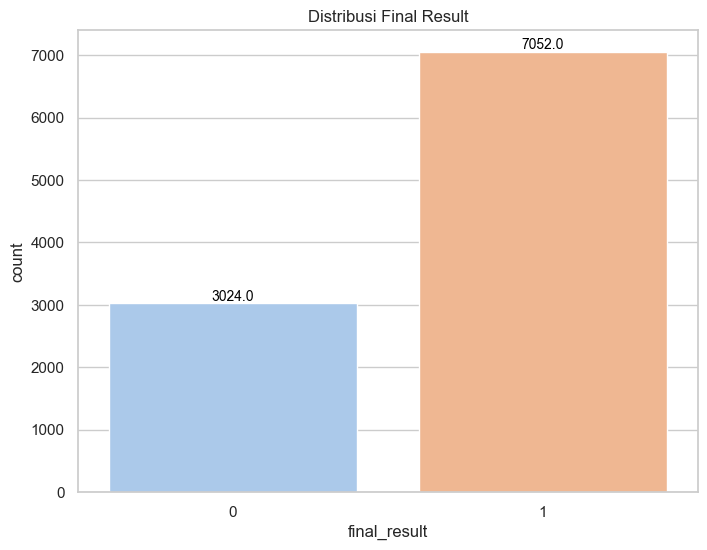

In [8]:
df = data.copy()

# Menghitung distribusi nilai yang sudah diganti
result_distribution = df['final_result'].value_counts()

# Set style seaborn
sns.set(style="whitegrid")
sns.color_palette("pastel")

# Membuat plot dengan Seaborn
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='final_result', data=df, palette="pastel")

# Menambahkan nilai setiap label di atas batang diagram
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Menampilkan judul
plt.title('Distribusi Final Result')
plt.show()

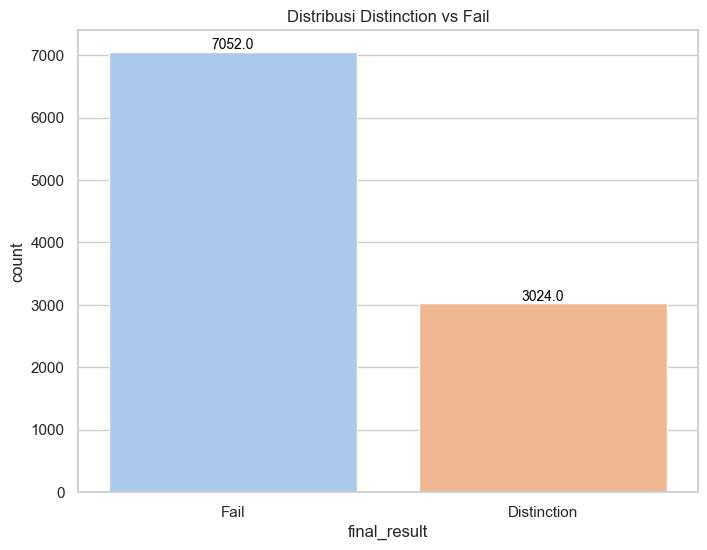

In [9]:
df = data.copy()

# Mengganti label 0 menjadi "Fail" dan label 1 menjadi "Pass"
df['final_result'] = df['final_result'].map({0: 'Distinction', 1: 'Fail'})

# Menghitung distribusi nilai yang sudah diganti
result_distribution = df['final_result'].value_counts()

# Set style seaborn
sns.set(style="whitegrid")
sns.color_palette("pastel")

# Membuat plot dengan Seaborn
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='final_result', data=df, palette="pastel")

# Menambahkan nilai setiap label di atas batang diagram
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Menampilkan judul
plt.title('Distribusi Distinction vs Fail')
plt.show()


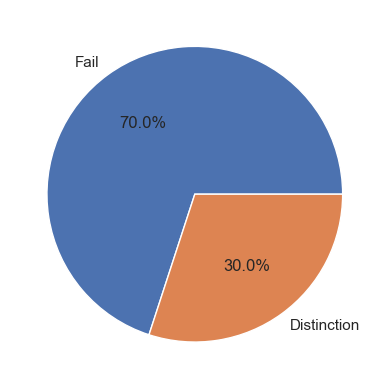

In [10]:
plt.pie(df['final_result'].value_counts().values,
        labels = df['final_result'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

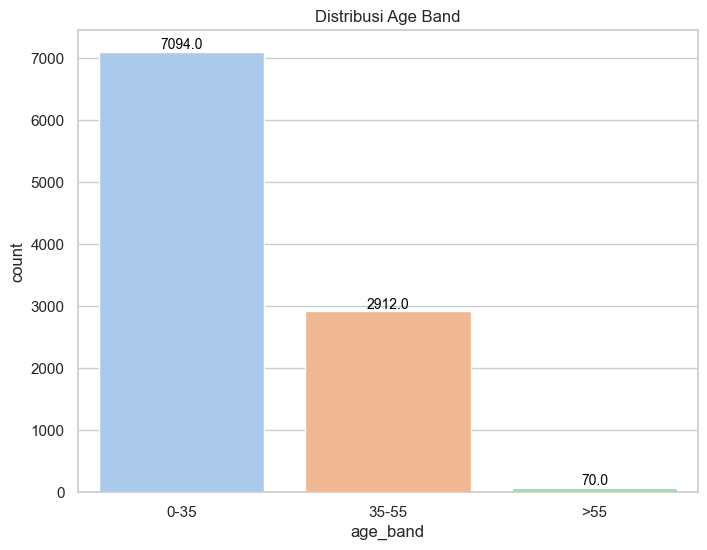

In [11]:
result_distribution = data['age_band'].value_counts()

sns.set(style="whitegrid")
sns.color_palette("pastel")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='age_band', data=data, palette="pastel")

# Menambahkan deskripsi nilai di atas batang diagram
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Menambahkan deskripsi nilai kategori di atas diagram
ax.set_xticklabels(['0-35', '35-55', '>55'])

plt.title('Distribusi Age Band')
plt.show()

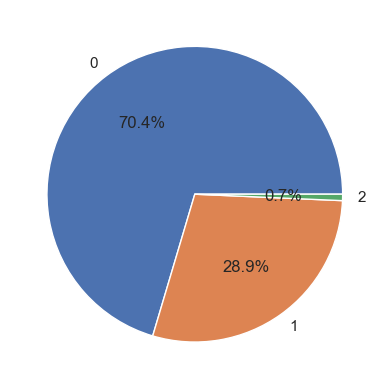

In [12]:
plt.pie(df['age_band'].value_counts().values,
        labels = df['age_band'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

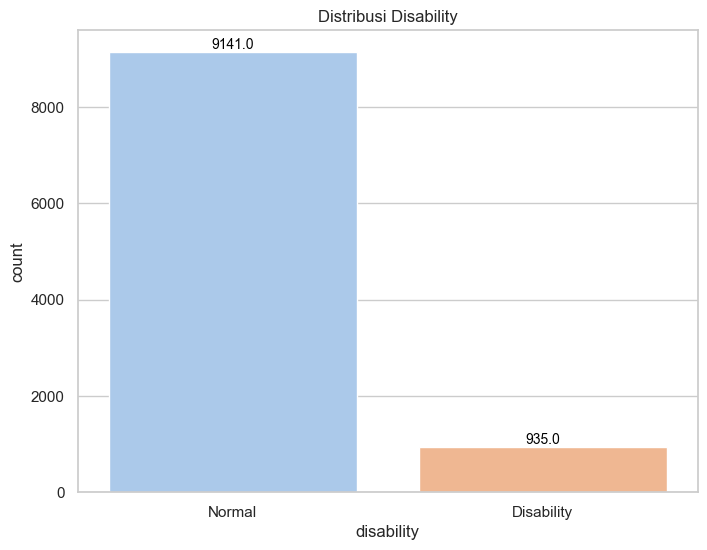

In [13]:
result_distribution = data['disability'].value_counts()

sns.set(style="whitegrid")
sns.color_palette("pastel")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='disability', data=data, palette="pastel")

# Menambahkan deskripsi nilai di atas batang diagram
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Menambahkan deskripsi nilai kategori di atas diagram
ax.set_xticklabels(['Normal', 'Disability'])

plt.title('Distribusi Disability')
plt.show()

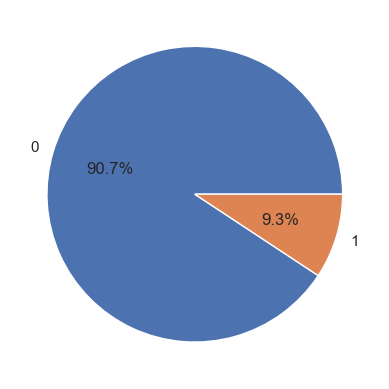

In [14]:
plt.pie(df['disability'].value_counts().values,
        labels = df['disability'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

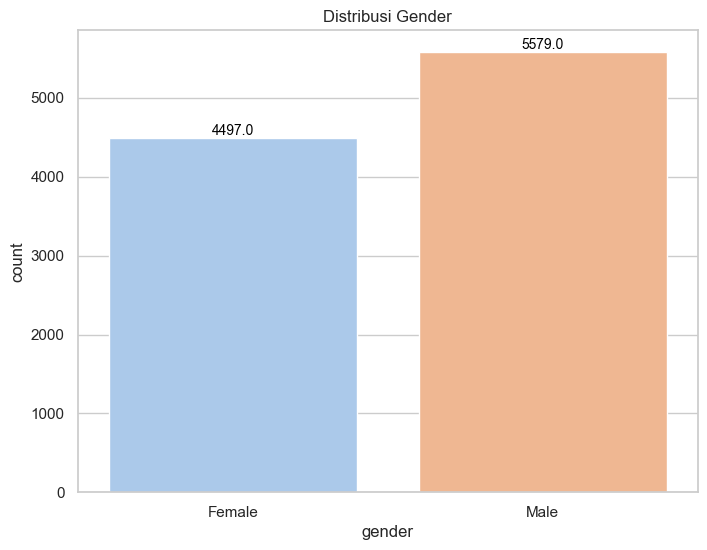

In [15]:
result_distribution = data['gender'].value_counts()

sns.set(style="whitegrid")
sns.color_palette("pastel")

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='gender', data=data, palette="pastel")

# Menambahkan deskripsi nilai di atas batang diagram
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Menambahkan deskripsi nilai kategori di atas diagram
ax.set_xticklabels(['Female', 'Male'])

plt.title('Distribusi Gender')
plt.show()

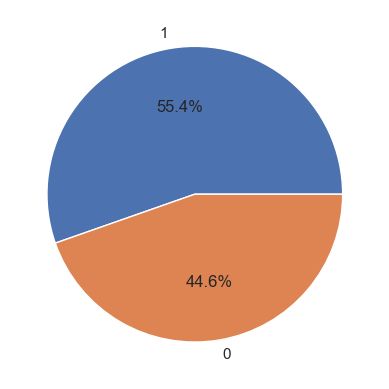

In [16]:
plt.pie(df['gender'].value_counts().values,
        labels = df['gender'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [17]:
data.isnull().sum()

code_module                   0
code_presentation             0
gender                        0
region                        0
highest_education             0
imd_band                      0
age_band                      0
num_of_prev_attempts          0
studied_credits               0
disability                    0
final_result                  0
all_activity_sumclick         0
after_clicks_sum              0
before_clicks_sum             0
forumng_clicks_sum            0
homepage_clicks_sum           0
oucontent_clicks_sum          0
subpage_clicks_sum            0
url_clicks_sum                0
resource_clicks_sum           0
glossary_clicks_sum           0
dataplus_clicks_sum           0
oucollaborate_clicks_sum      0
quiz_clicks_sum               0
ouelluminate_clicks_sum       0
sharedsubpage_clicks_sum      0
questionnaire_clicks_sum      0
page_clicks_sum               0
externalquiz_clicks_sum       0
ouwiki_clicks_sum             0
dualpane_clicks_sum           0
repeatac

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10076 entries, 18 to 32592
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   code_module                 10076 non-null  int64
 1   code_presentation           10076 non-null  int64
 2   gender                      10076 non-null  int64
 3   region                      10076 non-null  int64
 4   highest_education           10076 non-null  int64
 5   imd_band                    10076 non-null  int64
 6   age_band                    10076 non-null  int64
 7   num_of_prev_attempts        10076 non-null  int64
 8   studied_credits             10076 non-null  int64
 9   disability                  10076 non-null  int64
 10  final_result                10076 non-null  int32
 11  all_activity_sumclick       10076 non-null  int64
 12  after_clicks_sum            10076 non-null  int64
 13  before_clicks_sum           10076 non-null  int64
 14  forumng_cl

In [19]:
filtered_data = df.loc[(df['gender'] == 1) & (df['disability'] == 1)]

In [20]:
filtered_data

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,all_activity_sumclick,after_clicks_sum,before_clicks_sum,forumng_clicks_sum,homepage_clicks_sum,oucontent_clicks_sum,subpage_clicks_sum,url_clicks_sum,resource_clicks_sum,glossary_clicks_sum,dataplus_clicks_sum,oucollaborate_clicks_sum,quiz_clicks_sum,ouelluminate_clicks_sum,sharedsubpage_clicks_sum,questionnaire_clicks_sum,page_clicks_sum,externalquiz_clicks_sum,ouwiki_clicks_sum,dualpane_clicks_sum,repeatactivity_clicks_sum,folder_clicks_sum,htmlactivity_clicks_sum,date_registration,module_presentation_length,CMA_sumScore,TMA_sumScore,Exam_sumScore
86,0,1,1,0,0,4,0,0,90,1,Fail,333,320,13,13,81,193,30,11,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,268,0,170,0
201,0,1,1,6,0,4,0,0,60,1,Fail,342,342,0,60,67,161,42,3,7,1,0,1,0,0,0,0,0,0,0,0,0,0,0,15,268,0,228,0
361,0,1,1,11,0,4,0,0,60,1,Fail,92,47,45,4,29,44,9,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,109,268,0,0,0
544,0,3,1,0,0,5,0,0,120,1,Distinction,1660,1615,45,300,300,943,76,6,24,0,11,0,0,0,0,0,0,0,0,0,0,0,0,37,269,0,415,0
703,0,3,1,3,0,1,1,1,60,1,Fail,298,149,149,39,62,168,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,269,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32287,6,3,1,5,0,3,0,0,30,1,Distinction,967,954,13,47,176,598,25,0,33,3,0,0,85,0,0,0,0,0,0,0,0,0,0,45,269,580,260,0
32358,6,3,1,5,0,0,0,0,30,1,Fail,27,14,13,0,11,5,6,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77,269,0,0,0
32383,6,3,1,6,0,6,1,0,30,1,Fail,528,521,7,25,192,121,43,0,35,0,0,0,112,0,0,0,0,0,0,0,0,0,0,58,269,432,179,0
32410,6,3,1,8,0,4,1,0,30,1,Fail,435,435,0,198,70,86,50,0,25,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,269,0,0,0


In [21]:
data['final_result'].value_counts()

final_result
1    7052
0    3024
Name: count, dtype: int64

In [22]:
X = data.drop(columns='final_result')
y = data.final_result

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [24]:
RF_model = RandomForestClassifier(random_state=280)

In [25]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=280)

In [26]:
RF_pred = RF_model.predict(X_test)

In [27]:
RF_classification_rep = classification_report(y_test, RF_pred)
RF_confusion_mat = confusion_matrix(y_test, RF_pred)

In [28]:
print("Classification Report Random Forest:")
print(RF_classification_rep)

Classification Report Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       611
           1       0.98      0.98      0.98      1405

    accuracy                           0.97      2016
   macro avg       0.96      0.97      0.96      2016
weighted avg       0.97      0.97      0.97      2016



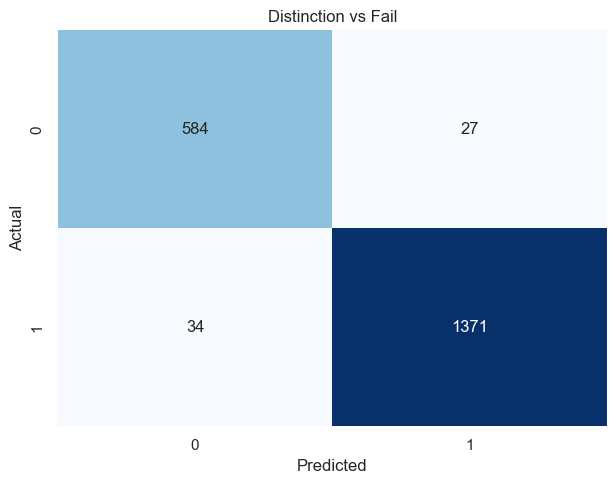

In [29]:
# Plot Confusion Matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(RF_confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Distinction vs Fail')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# FAIRNESS 

In [260]:
exp = dx.Explainer(RF_model, X_test, y_test)

Preparation of a new explainer is initiated

  -> data              : 2016 rows 38 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 2016 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000002A248B26940> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.


  -> predicted values  : min = 0.0, mean = 0.695, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.94, mean = 0.00197, max = 0.94
  -> model_info        : package sklearn

A new explainer has been created!


**Model Performance**

In [261]:
exp.model_performance()

,recall,precision,f1,accuracy,auc
RandomForestClassifier,0.972954,0.978525,0.975732,0.96627,0.995066


**Preparing Fairness Parameter 1**

protected - array dengan nilai subgrup yang menunjukkan atribut sensitif (variabel yang dilindungi) seperti jenis kelamin, ras, umur, dll. Metrik keadilan akan dihitung untuk masing-masing subgrup tersebut dan dibandingkan.

privilede - string yang mewakili salah satu subgrup. String tersebut harus menjadi salah satu yang dicurigai memiliki keistimewaan paling besar.

*Disini saya merubah umur 0-35 menjadi young dan >35 menjadi old

In [262]:
X_test['gender'] = X_test['gender'].replace({0: 'female', 1: 'male'})

In [263]:
# array with values like male_old, female_young, etc.
protected = X_test.gender + '_' + np.where(X_test.age_band == 0, 'young', 'old')

privileged = 'male_young'

**Creating Fairness Model Checker**

In [264]:
fobject = exp.model_fairness(protected = protected, privileged=privileged)

-Epsilon adalah nilai ambang batas antara 0 dan 1 yang digunakan sebagai nilai minimum acceptable dari suatu rasio.

-Pada contoh tersebut, epsilon diatur sebesar 0.8, yang berarti model dianggap adil jika rasio metrik tertentu berada dalam kisaran 0.8 hingga 1.25.

-Epsilon ini mencerminkan prinsip empat perlima (80% rule), yang sering digunakan dalam konteks keadilan

In [265]:
fobject.fairness_check(epsilon = 0.8, verbose=False)

Bias detected in 2 metrics: FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'male_young'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
                   TPR       ACC       PPV       FPR       STP
female_old    0.941117  0.960123  0.982741  1.023256  0.760054
female_young  0.978680  0.971370  0.980711  1.906977  0.945040
male_old      1.010152  1.015337  1.010152  0.209302  0.856568


-Tabel menunjukkan perbandingan metrik antara kelompok 'female_old', 'female_young', dan 'male_young'.

-Untuk setiap metrik (TPR, ACC, PPV, FPR, STP), rasio antara kelompok diukur dan dibandingkan dengan nilai epsilon (0.8) dan 1.25.

-Semua nilai rasio berada dalam kisaran (0.8, 1.25), menunjukkan bahwa metrik-metrik tersebut dianggap seimbang sesuai dengan kriteria yang diatur.

**Result**

Atribut hasil adalah metric_scores dimana setiap baris dibagi dengan baris yang diindeks dengan hak istimewa (dalam hal ini male_old).

In [266]:
# to see all scaled metric values you can run
fobject.result

,TPR,TNR,PPV,NPV,FNR,FPR,FDR,FOR,ACC,STP
female_old,0.941117,0.998955,0.982741,0.940439,4.866667,1.023256,2.133333,2.325581,0.960123,0.760054
female_young,0.978680,0.959248,0.980711,0.954023,2.400000,1.906977,2.266667,2.023256,0.971370,0.945040
male_old,1.010152,1.035528,1.010152,1.035528,0.333333,0.209302,0.333333,0.209302,1.015337,0.856568
male_young,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Fairness Check plot**

In [267]:
fobject.plot()

**Metric Scores plot**

In [268]:
# or unscaled ones via
fobject.metric_scores

,TPR,TNR,PPV,NPV,FNR,FPR,FDR,FOR,ACC,STP
female_old,0.927,0.956,0.968,0.900,0.073,0.044,0.032,0.100,0.939,0.567
female_young,0.964,0.918,0.966,0.913,0.036,0.082,0.034,0.087,0.950,0.705
male_old,0.995,0.991,0.995,0.991,0.005,0.009,0.005,0.009,0.993,0.639
male_young,0.985,0.957,0.985,0.957,0.015,0.043,0.015,0.043,0.978,0.746


In [269]:
fobject.plot(type = "metric_scores")

**Preparing Fairness Parameter 2**

*Disini saya merubah kondisi non-disability menjadi normal dan disabilitas tetap menjadi disability nilainya

In [270]:
# array with values like male_old, female_young, etc.
protected2 = X_test.gender + '_' + np.where(X_test.disability == 0, 'normal', 'disability')

privileged2 = 'male_normal'

**Creating Fairness Model Checker**

In [271]:
fobject2 = exp.model_fairness(protected = protected2, privileged=privileged2)


In [272]:
fobject2.fairness_check(epsilon = 0.8)

Bias detected in 1 metric: FPR

Conclusion: your model cannot be called fair because 1 criterion exceeded acceptable limits set by epsilon.
It does not mean that your model is unfair but it cannot be automatically approved based on these metrics.

Ratios of metrics, based on 'male_normal'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
                        TPR       ACC       PPV       FPR       STP
female_disability  0.965517  0.984725  1.012146       NaN  0.922644
female_normal      0.967546  0.962322  0.974696  2.500000  0.932489
male_disability    1.014199  1.006110  0.996964  1.866667  1.122363

Warning!
Take into consideration that NaN's are present, consider checking 'metric_scores' plot to see the difference


**Result**

In [273]:
fobject2.result

,TPR,TNR,PPV,NPV,FNR,FPR,FDR,FOR,ACC,STP
female_disability,0.965517,1.030928,1.012146,0.934783,3.428571,NaN,NaN,2.852941,0.984725,0.922644
female_normal,0.967546,0.953608,0.974696,0.939959,3.285714,2.500000,3.083333,2.705882,0.962322,0.932489
male_disability,1.014199,0.973196,0.996964,1.035197,NaN,1.866667,1.250000,NaN,1.006110,1.122363
male_normal,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [274]:
fobject2.metric_scores

,TPR,TNR,PPV,NPV,FNR,FPR,FDR,FOR,ACC,STP
female_disability,0.952,1.000,1.000,0.903,0.048,0.000,0.000,0.097,0.967,0.656
female_normal,0.954,0.925,0.963,0.908,0.046,0.075,0.037,0.092,0.945,0.663
male_disability,1.000,0.944,0.985,1.000,0.000,0.056,0.015,0.000,0.988,0.798
male_normal,0.986,0.970,0.988,0.966,0.014,0.030,0.012,0.034,0.982,0.711


**Fairness Check plot**

In [275]:
fobject2.plot()

**Metric Scores plot**

In [276]:
fobject2.plot(type = 'metric_scores')